In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes, inset_axes

In [2]:
def getVm(m, b):
    return 1 / (m + b)

def getC(m, b):
    return 1 + (m / b)

def getdVm(m, b, dm, db):
    f = 1 / (m + b)**2
    dm = dm**2
    db = db**2
    return f * (dm + db)**0.5

def getdC(m, b, dm, db):
    f = 1 / b
    dm = dm**2
    db = db**2
    return f * (dm + db*(m/b)**2)**0.5

def BET(vm, c, psi):
    num = vm * c * psi
    dem = (1 - c) * psi**2 + (c - 2) * psi + 1
    
    return num / dem


def getSignificant(value, uncertainty):
    u = "%.0e"%uncertainty
    uval, uexp = u.split('e')
    uval = int(uval)
    uexp = int(uexp)
    
    v = "%.0e"%value
    vval, vexp = v.split('e')
    vval = int(vval)
    vexp = int(vexp)
    
    exp = vexp - uexp
    
    vval = value*10**-uexp
    vval = int(round(vval, 0))
    
    return (vval, uval, uexp)

def makeString(value, uncertainty, base):
    return r"(%d \pm %d)\times10^{%d}"%(value, uncertainty, base)

In [3]:
rP, V = np.genfromtxt('SBA-15-Y2 PAO2 (Isotherm).csv', skip_header = 1, delimiter = ',').T

In [4]:
y = rP/(V*(1 - rP))
valid = (rP > 0.001) & (rP < 0.33)

xbet = rP[valid]
ybet = y[valid]

In [5]:
(m, b), cov = np.polyfit(xbet, ybet, 1, cov = True)
dm = cov[0, 0]**0.5
db = cov[1, 1]**0.5

xfit = np.linspace(0, 1)
yfit = m*xfit + b

In [6]:
vm = getVm(m, b)
C = getC(m, b)
dvm = getdVm(m, b, dm, db)
dC = getdC(m, b, dm, db)
print(m, b)
print(vm, dvm)
print(C, dC)

0.006463977567770335 1.3618974108645333e-05
154.37824716849784 0.986790934761154
475.63028538008587 189.02301634141986


In [7]:
mtext = makeString(*getSignificant(m, dm))
btext = makeString(*getSignificant(b, db))

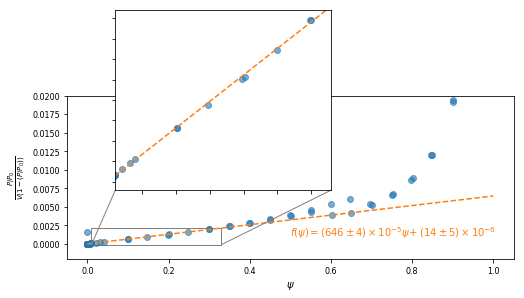

In [8]:
fig, ax = plt.subplots(figsize = (8, 3))
axins = inset_axes(ax, 3, 2.5, loc = 2, bbox_to_anchor = (0.2, 1.3), bbox_transform = ax.figure.transFigure) # no zoom
# axins = zoomed_inset_axes(ax, 2.2, loc = 2) # zoom-factor: 2.5, location: upper-left

for axes in [ax, axins]:
    axes.plot(rP, y, 'o', alpha = 0.6)
    c = axes.plot(xfit, yfit, '--')[0].get_color()

axins.set_xlim(0.01, 0.33) # apply the x-limits
axins.set_ylim(-1e-4, 2.1e-3) # apply the y-limits

# axins.set_tick_params(labelbottom=True)
plt.yticks(visible=False)
plt.xticks(visible=False)

mark_inset(ax, axins, loc1 = 3, loc2 = 4, fc="none", ec="0.5")

xlabel = '$\psi$'
ylabel = r'$\frac{P/P_0}{V(1-(P/P_0))}$'

ax.set_xlabel(xlabel, fontsize = 10)
ax.set_ylabel(ylabel, fontsize = 10)

eq =  "$f(\psi) = %s$"%mtext + xlabel + '+ $%s$'%btext

ax.set_ylim(-2e-3, 2e-2)

ax.tick_params(axis='both', which='major', labelsize=8)

ax.text(0.5, 1e-3, eq, color = c)

plt.savefig('BET.png', dpi = 300, bbox_inches = "tight")

plt.show()

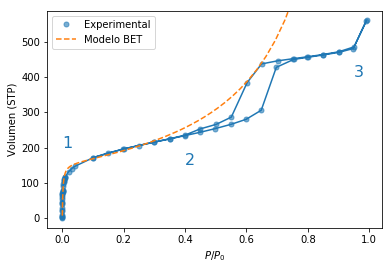

In [9]:
c = plt.plot(rP, V, "o", ms = 5, alpha = 0.6, label = 'Experimental')[0].get_color()
plt.plot(rP, V, "-", c = c)

psi = np.logspace(-4, -0.1, 200)
VBET = BET(vm, C, psi)

ylim = plt.gca().get_ylim()

plt.plot(psi, VBET, '--', label = 'Modelo BET')

plt.xlabel('$P/P_0$')
plt.ylabel('Volumen (STP)')#(cm$^3$/g)')

plt.ylim(ylim)
fs = 16

plt.text(1e-6, 200, '1', color = c, fontsize = fs)
plt.text(0.4, 150, '2', color = c, fontsize = fs)
plt.text(0.95, 400, '3', color = c, fontsize = fs)

plt.legend()

plt.savefig('isoterma.png', dpi = 300)

plt.show()